In [31]:
# Import needed libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [32]:
#Defines Global Variables data entries
TOTAL_DATA = 150

# Splits data into training(80%) and testing(20%)
TRAINING_DATA = int(TOTAL_DATA*0.8) 
TESTING_DATA = int(TOTAL_DATA*0.2)

# Number of input features
FEATURE_NUMBER = 4

# Number of classes and respective indexing
CLASS_NUMBER = 3
CLASSNAMES = ['Iris-setosa', 'Iris-versicolor', 'Iris-virginica']

In [33]:
# Read in data
data = pd.read_csv('../../DataSets/Iris.csv')

#Splits into 2 classes instead of 3
#data = data[0:100]

# Shuffle data
data = data.sample(frac = 1)

data.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
113,114,5.7,2.5,5.0,2.0,Iris-virginica
141,142,6.9,3.1,5.1,2.3,Iris-virginica
66,67,5.6,3.0,4.5,1.5,Iris-versicolor
121,122,5.6,2.8,4.9,2.0,Iris-virginica
19,20,5.1,3.8,1.5,0.3,Iris-setosa


In [34]:
# Pulling feature data and splicing it for training/testing using 80-20 ratio
x_train = data.iloc[:TRAINING_DATA, 1:FEATURE_NUMBER+1].values
x_test = data.iloc[TRAINING_DATA:, 1:FEATURE_NUMBER+1].values

# Standardizes the data by dividing the entries by standard deviation (i.e calculating how many standard deviations the entries are from the center)
x_train = (x_train - np.mean(x_train, axis=0)) / np.std(x_train, axis=0)
x_test = (x_test - np.mean(x_test, axis=0)) / np.std(x_test, axis=0)

# Reshape for matrix multiplication
x_train = x_train.reshape(FEATURE_NUMBER, TRAINING_DATA)
x_test = x_test.reshape(FEATURE_NUMBER, TESTING_DATA)



In [35]:
# Pulling label data and splicing it for training/testing using 80-20 ratio
y_train_data = data.iloc[:TRAINING_DATA, -1].values
y_test_data = data.iloc[TRAINING_DATA:, -1].values

# Create vectorized representations of each data point's class membership
y_train = np.zeros(shape=(CLASS_NUMBER, TRAINING_DATA))
y_test = np.zeros(shape=(CLASS_NUMBER, TESTING_DATA))

# Setting numeric labels for each data point's class
for row in range(CLASS_NUMBER):
    y_train[row, :TRAINING_DATA]  = [ele == CLASSNAMES[row] for ele in y_train_data]
    y_test[row, :TESTING_DATA] = [ele == CLASSNAMES[row] for ele in y_test_data]

In [36]:
# Randomly initialize weights and bias matricies
w = np.random.rand(CLASS_NUMBER, FEATURE_NUMBER)
b = np.random.rand(CLASS_NUMBER, 1)



In [37]:
#Class coresspondance function, returns a vector (z), which will be input into softmax function
#The highest number in z represents the correct class
def class_corr(weights, bias, x):
    
    numData = x.shape[1]
    #print(numData)
    z = weights.dot(x)
    #print(z)
    for input in range(numData):
        z[0:CLASS_NUMBER, input:input+1] += bias

    return z

z = class_corr(w, b, x_test)
print(z)



[[ 1.25640444  0.95516735 -0.1292134   0.84877535 -0.22230292 -0.17599895
   0.52494489  3.75848485 -0.99848303 -0.61942913 -0.52008848  0.12268437
  -0.24021288 -0.42258133  1.92178959  1.02751482  2.23360856  2.17097949
   2.14114132  0.23108121  2.4929369   2.01104029  2.06862675  0.5861075
   1.4452772   0.8608648   0.2038179   2.15899265  0.45575679  0.52600461]
 [ 0.04477653  0.52683178 -0.55288097 -0.02762124 -0.0768835  -0.00580224
   0.36228977  1.93424155 -1.37273246 -0.23148468 -1.1249002  -0.28798232
  -0.65912081 -1.47989438  0.82986053  0.02886474  0.74246218  0.14705158
   1.10446135 -0.27712282  1.16331981  1.37960707  0.51859579 -0.15651871
   0.87905657 -0.01811563 -0.06502448  1.11769517  0.49197107 -0.19066927]
 [-0.17423175 -0.18378151 -0.06839859  1.45683879 -0.40030542 -0.59806597
   0.41758807  2.27383191 -2.25537469 -1.60059891 -0.17835678 -0.01629219
  -0.2936119  -0.49119748  0.73620336  0.37443761  1.41948326  0.57794682
   0.61242037  0.07813365  1.97462142

In [38]:
#Softmax Function
#expnentiates all elements of the z vector and divides by their sum to see class probability
def softmax(z):

    #creates empty probability array
    y_hat = np.empty([z.shape[0], z.shape[1]])
    numData = z.shape[1]

    #exponentiates the matrix
    z_exp = np.exp(z)

    #Converts z vector into probability distribution
    for input in range(numData):
        z_sum = np.sum(z_exp[0:CLASS_NUMBER, input:input+1])
        y_hat[0:CLASS_NUMBER, input:input+1] = z_exp[0:CLASS_NUMBER, input:input+1]/z_sum
    return y_hat


y_pred = softmax(z)
print(softmax(z))


[[0.65067356 0.50716418 0.36800647 0.30739428 0.33406104 0.35196047
  0.36388919 0.72050229 0.50701135 0.3510225  0.33857448 0.39471767
  0.38376425 0.43839018 0.6093342  0.52943158 0.59946967 0.74881489
  0.63635783 0.40654542 0.53760509 0.55321111 0.54829175 0.36462463
  0.49234452 0.58056334 0.311071   0.64451592 0.29077507 0.47170356]
 [0.19371348 0.33046449 0.24091229 0.12796216 0.3863498  0.41726253
  0.30926369 0.11624561 0.34872511 0.51738888 0.18492168 0.2617799
  0.2524266  0.15229148 0.20447338 0.19503009 0.13494928 0.09894498
  0.22567165 0.24456757 0.14223878 0.29421373 0.11637021 0.17351121
  0.27948764 0.2410534  0.23774028 0.22751179 0.30149828 0.23036773]
 [0.15561296 0.16237134 0.39108124 0.56464356 0.27958916 0.23077699
  0.32684713 0.1632521  0.14426354 0.13158862 0.47650384 0.34350243
  0.36380915 0.40931834 0.18619242 0.27553833 0.26558105 0.15224014
  0.13797053 0.34888701 0.32015613 0.15257516 0.33533803 0.46186416
  0.22816783 0.17838327 0.45118873 0.1279723  0

In [39]:
#Loss function
#Returns the sum of all probabilities compared to the actual class
def cost(y, y_pred):

    total_loss = 0

    #Finds number of data samples
    numData = y.shape[1]

    #Manipulates y_pred into right form for the loss function
    y_pred = -1*np.log(y_pred)

    #iterates over all data samples
    for column in range(numData):

        #Computes total class loss for each data sample and sums them
        y_cur = y[0:CLASS_NUMBER, column:column+1].transpose()
        y_pred_cur = (y_pred[0:CLASS_NUMBER, column:column+1])
        total_loss += y_cur.dot(y_pred_cur)[0][0]

    #Divdes by number of data samples to find average error
    total_loss = total_loss/numData
    return total_loss
    
    

        



cost(y_test, y_pred)

1.2758539954002635

In [40]:
# Take the gradients of the loss with respect to weights and bias
def findGradients(x, y, y_pred):
    # Number of data samples
    numData = x.shape[1]

    # Calculate error for gradient computations
    error = y_pred - y
    error = error.transpose()
    

    # Dictionary for holding gradient values
    gradientDict = dict()
    gradientDict['gradWeights'] = np.array((1/numData) * x.dot(error))
    gradientDict['gradBias'] =  ((1/numData) * error.sum(axis=0)).reshape(1, CLASS_NUMBER)
    
    return gradientDict

y_pred = softmax(z)
findGradients(x_test, y_test, y_pred)

{'gradWeights': array([[-0.06644956,  0.00989198,  0.05655758],
        [ 0.07946516,  0.02779202, -0.10725717],
        [ 0.01942572, -0.0423792 ,  0.02295348],
        [ 0.20198805, -0.02599907, -0.17598898]]),
 'gradBias': array([[ 0.24472638, -0.19375541, -0.05097097]])}

In [41]:
# Repetitively perform gradient descent to improve model 
def gradientDescent(x, y, weights, bias, losses, max_iter, learning_rate, coeff_momentum):
    #Intializes starting variables and matricies which will get updated during momentum calculation
    momentum_grad_weights = np.zeros(shape=(FEATURE_NUMBER, CLASS_NUMBER))
    momentum_grad_bias = np.zeros(shape=(1, CLASS_NUMBER))

    for i in range(max_iter): 
        z = class_corr(weights, bias, x)
        y_pred = softmax(z)
        gradients = findGradients(x, y, y_pred)

        #Calculates Momentum
        momentum_grad_weights = coeff_momentum * momentum_grad_weights + (1-coeff_momentum) * np.square(gradients["gradWeights"])
        momentum_grad_bias = coeff_momentum * momentum_grad_bias + (1-coeff_momentum) * np.square(gradients["gradBias"])
        
        # Compute gradient descent
        weights = weights - (learning_rate * (np.divide(gradients["gradWeights"], np.sqrt(momentum_grad_weights))).transpose())
        bias = bias - (learning_rate * (np.divide(gradients["gradBias"], np.sqrt(momentum_grad_bias))).transpose())

        # Not required - meant to visualize model's performance
        loss = cost(y, y_pred)
        losses.append(loss)

        learning_rate *= 0.95

    return weights, bias


In [42]:
# List for storing log loss over time
losses = []

w, b = gradientDescent(x_train, y_train, w, b, losses, max_iter=50, learning_rate=0.1, coeff_momentum=0.9)

#print(w)
#print(b)

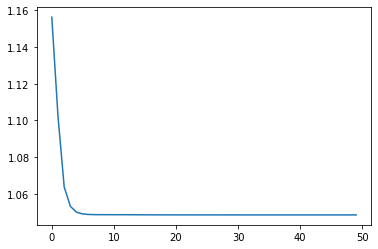

In [43]:
plt.plot(losses)

In [44]:
# Calculates accuracy of test data
def accuracy(y, y_pred):

    total_correct = 0
    confusion_matrix = np.zeros(shape=(CLASS_NUMBER, CLASS_NUMBER))

    numData = y.shape[1]
    
    # Iterating through all of data
    for data in range(numData):
        # Returns array for index of max probabilities for each data point 
        y_indexes = np.argmax(y, axis=0)
        y_pred_indexes = np.argmax(y_pred, axis=0)
        
        confusion_matrix[y_indexes[data]][y_pred_indexes[data]] += 1
        total_correct = np.sum(y_indexes == y_pred_indexes)
        
    total_accuracy = total_correct/numData
    return confusion_matrix, total_accuracy 


In [45]:
# Accuracy and confusion matrix check
z = class_corr(w, b, x_test)
y_pred = softmax(z)

confusion_matrix, model_acc = accuracy(y_test, y_pred)

print(confusion_matrix)
print(model_acc)


[[1. 1. 5.]
 [4. 3. 6.]
 [7. 1. 2.]]
0.2
